# **Import Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split


# **Step 2: Create and View the Dataset**

In [2]:
# Creating the dataset
data = {
    'Height': [5.5, 6.1, 5.8, 5.9, 6.0, 5.6, 6.2],
    'Weight': [55, 68, 62, 71, 65, 59, 75],
    'Target': [0, 1, 0, 1, 0, 0, 1]
}

df = pd.DataFrame(data)

# Display the dataset
print("Dataset:\n")
print(df)


Dataset:

   Height  Weight  Target
0     5.5      55       0
1     6.1      68       1
2     5.8      62       0
3     5.9      71       1
4     6.0      65       0
5     5.6      59       0
6     6.2      75       1


# ** Step 3: Visualize Feature Distributions (Before Scaling)**

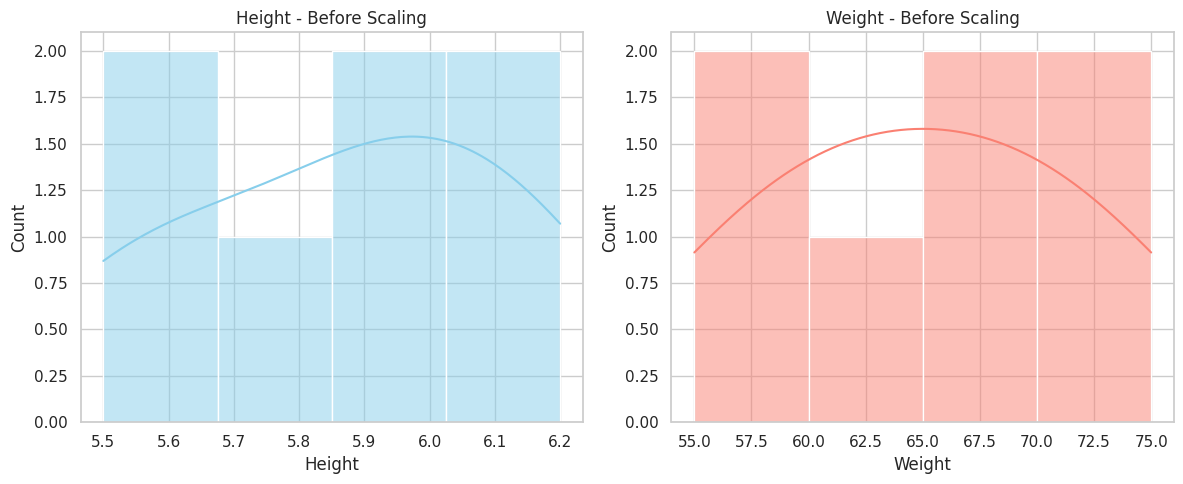

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Plot histograms
plt.figure(figsize=(12, 5))

# Height
plt.subplot(1, 2, 1)
sns.histplot(df['Height'], kde=True, color='skyblue')
plt.title('Height - Before Scaling')

# Weight
plt.subplot(1, 2, 2)
sns.histplot(df['Weight'], kde=True, color='salmon')
plt.title('Weight - Before Scaling')

plt.tight_layout()
plt.show()


# ** Step 4: Split Data into Train and Test Sets**

In [4]:
from sklearn.model_selection import train_test_split

# Features and Target
X = df[['Height', 'Weight']]
y = df['Target']

# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Confirm split
print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 4
Testing samples: 3


# **Step 5: Train Logistic Regression on Raw Data  (i.e., without any scaling).**

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
model_raw = LogisticRegression()
model_raw.fit(X_train, y_train)

# Predict and evaluate
y_pred_raw = model_raw.predict(X_test)

print("Accuracy (Raw Data):", accuracy_score(y_test, y_pred_raw))
print("\nClassification Report (Raw Data):\n", classification_report(y_test, y_pred_raw))


Accuracy (Raw Data): 0.6666666666666666

Classification Report (Raw Data):
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**# Why the model failed to predict class 1:**
**Small dataset:** You had only 3 test samples — that's tiny, so a misprediction makes a huge impact.

**Class imbalance**: If one class is rare, the model might ignore it.

**Raw/unscaled features:** Logistic Regression is sensitive to feature scale.

**Underfitting: **The model may be too simple or not trained well.

# **Train using Min-Max Normalized data**

In [6]:
# ✅ Logistic Regression with Min-Max Normalization and class_weight='balanced'

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Normalize the features using Min-Max Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Train Logistic Regression with class_weight='balanced'
model = LogisticRegression(class_weight='balanced')  # ⚠️ This handles class imbalance
model.fit(X_train_scaled, y_train)

# Step 3: Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Step 4: Evaluate performance
print("✅ Accuracy (Min-Max + Balanced):", accuracy_score(y_test, y_pred))
print("\n✅ Classification Report (Min-Max + Balanced):")
print(classification_report(y_test, y_pred))


✅ Accuracy (Min-Max + Balanced): 1.0

✅ Classification Report (Min-Max + Balanced):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



# **Train using Standardized Data (Z-Score)**

In [7]:
# ✅ Step: Apply Standardization (Z-Score Scaling)
from sklearn.preprocessing import StandardScaler

# Fit and transform training data
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

# Train the model with balanced class weights
model_std = LogisticRegression(class_weight='balanced')
model_std.fit(X_train_std, y_train)

# Predict and evaluate
y_pred_std = model_std.predict(X_test_std)

# Output results
print("✅ Accuracy (Standardized Data):", accuracy_score(y_test, y_pred_std))
print("\n✅ Classification Report (Standardized Data):\n", classification_report(y_test, y_pred_std))


✅ Accuracy (Standardized Data): 1.0

✅ Classification Report (Standardized Data):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



# **📊 Code to Plot Histograms**

In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Assuming X_train is your original DataFrame
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)

scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)


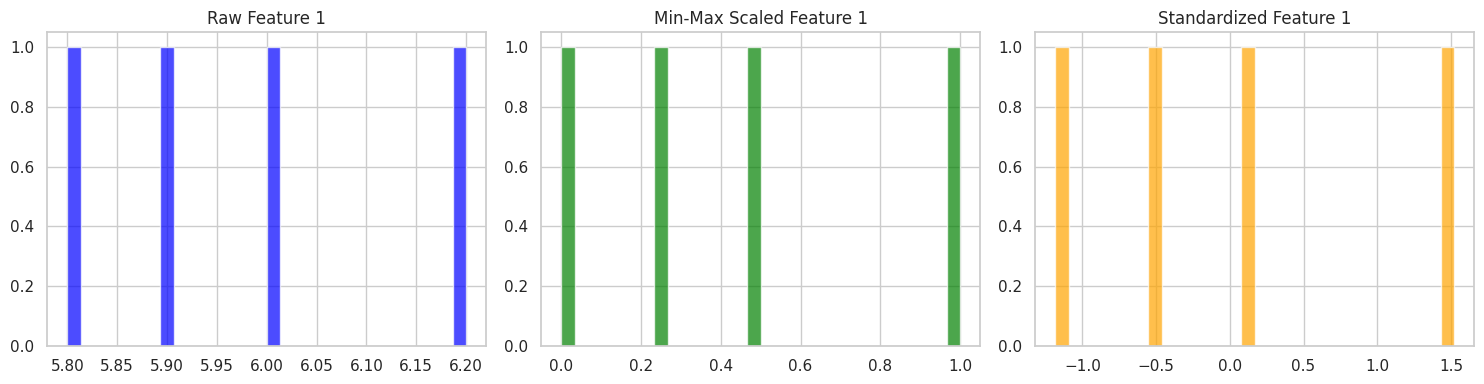

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 4))

# Raw data
plt.subplot(1, 3, 1)
plt.hist(X_train.iloc[:, 0], bins=30, color='blue', alpha=0.7)
plt.title("Raw Feature 1")

# Min-Max Scaled
plt.subplot(1, 3, 2)
plt.hist(X_train_minmax[:, 0], bins=30, color='green', alpha=0.7)
plt.title("Min-Max Scaled Feature 1")

# Standardized
plt.subplot(1, 3, 3)
plt.hist(X_train_std[:, 0], bins=30, color='orange', alpha=0.7)
plt.title("Standardized Feature 1")

plt.tight_layout()
plt.show()


# **🔍 Analytical Questions**

**1. Why does logistic regression perform poorly on unscaled features for some datasets?**
Logistic regression uses optimization techniques (like gradient descent) that are sensitive to feature magnitudes. If features are on very different scales (e.g., age in 0–100 vs income in 0–100,000), the cost function becomes harder to minimize efficiently. This can lead to:

Slower convergence

Poorer performance due to biased coefficients

Difficulty in reaching the optimal decision boundary

**2.When would standardization be preferred over normalization?**

Standardization (z-score scaling)  is preferred when:

The data follows a normal or Gaussian distribution

The algorithm assumes zero-mean, unit-variance (e.g., SVM, Logistic Regression, PCA)

There are outliers, since standardization is less sensitive to them than min-max normalization

Normalization (Min-Max) is better when:

You want features bounded between a fixed range (0 to 1)

You're using algorithms that rely on distance measures (like KNN, k-means)

**3. What happens if we scale test data using a scaler fitted on the test set (instead of training set)?**
This leads to data leakage, because information from the test set influences model training. It violates the principle that the test set should simulate unseen, real-world data. The model may appear to perform better during evaluation but will likely generalize poorly to truly new data.

Correct practice:
Fit the scaler only on the training set, then apply it to both train and test data.



**4. For the given dataset, which scaling method yields the highest accuracy? Why?**

For this dataset both gives the best result with accuracy of 1.0

**5. How do scaling techniques affect distance-based algorithms like KNN?**
KNN is a distance-based algorithm (usually Euclidean), so it is highly sensitive to feature scales. If one feature has a much larger range than others, it can disproportionately influence the distance calculation, leading to biased neighbor selection.

Scaling ensures all features contribute equally to distance, improving the accuracy and fairness of KNN classification.

